In [1]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
from matplotlib.ticker import MultipleLocator

# HR v Age - with Redshift cuts

Since we can't figure out what is happening, does it change with redshift?

In [35]:
dataset = 'gupta'   # 'gupta' or 'campbell' or 'campbellG'
z_max = 0.2   # campbell is already cut at  ~0.33

## Import HR

In [36]:
if dataset in ['campbell', 'campbellG']:
    # Campbell objects
    # Campbell uncorrected distances
    SNData = pd.read_csv('../data/CampbellHoltzman_mb.tsv', sep='\t', usecols=['SNID', 'redshift', 'hr', 'err_mu'], index_col='SNID')
    SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
if dataset == 'gupta':
    # Gupta objects
    # Guptas cosmology
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
print(len(SNData))
SNData.head(5)

206


,hr,hr uncert
1166,-0.3288,0.2179
1253,-0.1097,0.1611
1371,-0.1775,0.0566
1580,-0.1156,0.0775
1688,0.0240,0.2309


## Cut on Redshift & HR

In [5]:
if dataset in ['campbell', 'campbellG']:
    SNData = SNData[SNData['redshift']<z_max]
    print(len(SNData))

    SNData = SNData[SNData['hr']<0.7]
    SNData = SNData[SNData['hr']>-0.7]
    print(len(SNData))

110
104


## Import Ages

In [37]:
# number of samples desired
num = 100

In [38]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,hr,hr uncert,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 90,random age 91,random age 92,random age 93,random age 94,random age 95,random age 96,random age 97,random age 98,random age 99
1166,-0.3288,0.2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,-0.1097,0.1611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,-0.1775,0.0566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,-0.1156,0.0775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1688,0.0240,0.2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,0.2671,0.1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,0.3219,0.1315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,0.2954,0.1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,-0.1379,0.0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2422,0.2078,0.1181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


Randomness is used to sample the posteriors. Large samples are used to accurately represent the distributions. The seed is randomly choosen and used so that the same plot can be recreated. The seed was not changed in order to make the "best" looking figures.

Also we now need to get the ages and the HR distributions at the same time as we set the seed. This way we can't accidently get one distribution x-times after the seed has already been set. 

In [39]:
np.random.seed(1378052)   #set a seed for reproducibility

if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(test.head(5))


#-----------#


# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+(test.iloc[index]['hr uncert']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

print(plot.head(5))

Skipping SN1253 becuase ../resources/SN1253_gupta_chain.tsv is not present
Skipping SN1371 becuase ../resources/SN1371_gupta_chain.tsv is not present
Skipping SN1688 becuase ../resources/SN1688_gupta_chain.tsv is not present
Skipping SN2017 becuase ../resources/SN2017_gupta_chain.tsv is not present
Skipping SN2330 becuase ../resources/SN2330_gupta_chain.tsv is not present
Skipping SN2372 becuase ../resources/SN2372_gupta_chain.tsv is not present
Skipping SN2533 becuase ../resources/SN2533_gupta_chain.tsv is not present
Skipping SN2635 becuase ../resources/SN2635_gupta_chain.tsv is not present
Skipping SN2943 becuase ../resources/SN2943_gupta_chain.tsv is not present
Skipping SN3080 becuase ../resources/SN3080_gupta_chain.tsv is not present
Skipping SN3199 becuase ../resources/SN3199_gupta_chain.tsv is not present
Skipping SN3256 becuase ../resources/SN3256_gupta_chain.tsv is not present
Skipping SN3451 becuase ../resources/SN3451_gupta_chain.tsv is not present
Skipping SN3452 becuase .

## Make plot

In [9]:
# Set plot configurations

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
uuid = 0   #need a place holder
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

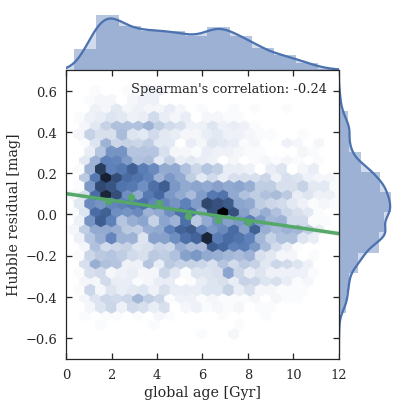

In [10]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot[plot['hr']<0.6]['age'], plot[plot['hr']<0.6]['hr'], stat_func=spearmanr,
                  kind="hex", gridsize=25,
# g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('HRvAge-campbell-global-corrected-z02.pdf')
# g.savefig('HRvAge-gupta-global.pdf')
plt.show()

# Other plots

Lets try

- Splitting the data in half (at 4 Gyr)
- Lets just try that for now

In [40]:
#only for Gupta
plot_old = plot[plot['age']>=6].copy()
plot_young = plot[plot['age']<6].copy()
print(len(plot), len(plot_old), len(plot_young))

6000 2210 3790


In [10]:
plot_old = plot[plot['age']>=7].copy()
plot_young = plot[plot['age']<7].copy()
print(len(plot), len(plot_old), len(plot_young))

10400 3068 7332


In [41]:
print('young: ', plot_young[plot_young['hr']<0.7].describe())
print('old: ', plot_old[plot_old['hr']<0.7].describe())

young:                  hr          age
count  3790.000000  3790.000000
mean      0.055375     3.218142
std       0.212782     1.461055
min      -0.554134     0.360534
25%      -0.084608     1.936810
50%       0.066517     3.090771
75%       0.193343     4.439126
max       0.673825     5.998716
old:                  hr          age
count  2210.000000  2210.000000
mean     -0.032786     7.816158
std       0.166683     1.301577
min      -0.576758     6.000609
25%      -0.138313     6.751380
50%      -0.035623     7.544913
75%       0.074138     8.649753
max       0.510363    12.067993


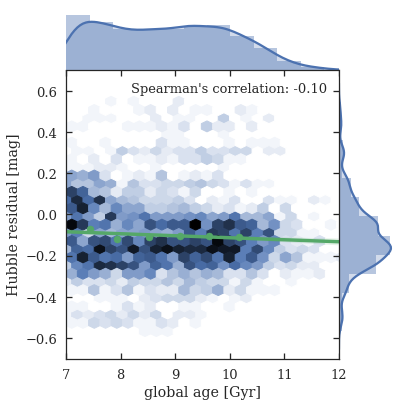

In [67]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_old['age'], plot_old['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(7,12), ylim=(-0.7, 0.7),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
g.savefig('HRvAge-campbell-global-corrected-z02old.pdf')
# g.savefig('HRvAge-gupta-global-old.pdf')
plt.show()

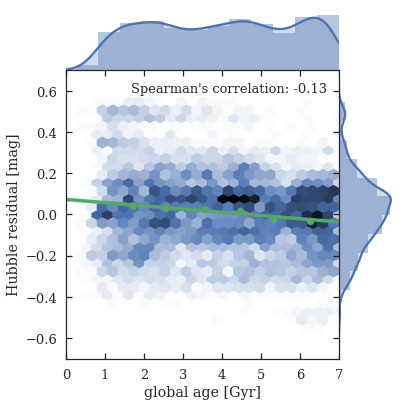

In [65]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_young['age'], plot_young['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(0,7), ylim=(-0.7, 0.7),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible
g.ax_joint.xaxis.set_major_locator(MultipleLocator(1))

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
g.savefig('HRvAge-campbell-global-corrected-z02young.pdf')
# g.savefig('HRvAge-gupta-global-young.pdf')
plt.show()

### Lets combine these two figures into one plot

In [26]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

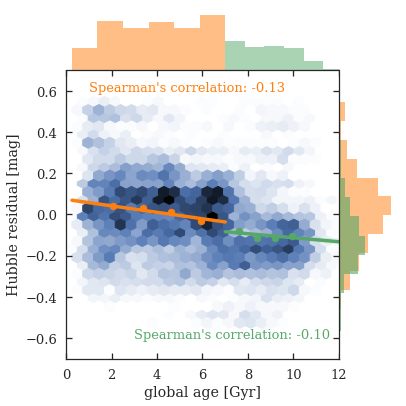

In [34]:
###Main joint data ONLY###

g = sns.jointplot('age', 'hr', data=plot[plot['hr']<0.7], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7),
                  marginal_kws={'kde':False, 'hist':False,
                                'kde_kws':{"shade":True}}
                 )
# g_y = g.jointplot('age', 'hr', data=plot_young, stat_func=spearmanr, kind="hex", gridsize=25,
#                   bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7), alpha=0,
#                   marginal_kws={'kde':False, 'hist':False,
#                                 'kde_kws':{"shade":True}}
#                  )


##regresion lines##

# color info: https://matplotlib.org/api/colors_api.html
sns.regplot(plot_young['age'], plot_young['hr'],
                      x_bins=4, x_ci=None, color='tab:orange',
                      truncate=True, ax=g.ax_joint)
sns.regplot(plot_old['age'], plot_old['hr'], 
                    x_bins=4, x_ci=None, color='g',
                    truncate=True, ax=g.ax_joint)


##Age distribution plots##

sns.distplot(plot_young[plot_young['hr']<0.7]['age'], bins=6, color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_x, kde=False,
             hist_kws={"alpha": 0.5})
sns.distplot(plot_old[plot_old['hr']<0.7]['age'], bins=6, color='g',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_x, kde=False,
             hist_kws={"alpha": 0.5})


##Hubble residual distribution plots##

sns.distplot(plot_young[plot_young['hr']<0.7]['hr'], bins=12, vertical=True, color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_y, kde=False,
             hist_kws={"alpha": 0.5})
# g.ax_marg_y.axhline(plot_young[plot_young['hr']<0.7]['hr'].median(), color='k',
#                     ls=':', lw='2')
sns.distplot(plot_old[plot_old['hr']<0.7]['hr'], bins=12, vertical=True, color='g',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_y, kde=False,
             hist_kws={"alpha": 0.6})
# g.ax_marg_y.axhline(plot_old[plot_old['hr']<0.7]['hr'].median(), color='k')


##Clean up##

#remove total correlation
g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
#                template="{stat}: {val:.2f}")
               template='')

# add other notations
sp_r_y = spearmanr(plot_young['age'], plot_young['hr']).correlation
sp_r_o = spearmanr(plot_old['age'], plot_old['hr']).correlation
g.ax_joint.text(1, 0.6, f"Spearman's correlation: {sp_r_y:.2f}", 
                {'fontsize':13}, color='tab:orange')
g.ax_joint.text(3, -0.6, f"Spearman's correlation: {sp_r_o:.2f}", 
                {'fontsize':13}, color='g')



#add lables
g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')

#adjsut tick marks
g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

#add legend
# plt.legend()

#save file
# g.savefig('HRvAge-campbell-local-corrected-z02splitDists.pdf')
plt.show()

In [97]:
spearmanr(plot_young['age'], plot_young['hr']).correlation

-0.1256408051420291

In [ ]:

# _ = g.ax_marg_x.kde(plot_young['age'])
# g = g.plot_marginals(sns.distplot, hist=True, kde_kws={"shade":True})

# _ = g.ax_marg_x.distplot(plot_young['age'])

# g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# g = g.plot_joint(plt.hexbin)#, x=plot_old['age'], y=plot_old['hr'])
#                  plot_old['age'], plot_old['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
#                   bins=None, space=0.05, xlim=(0,12),  ylim=ylim, #ylim=(-0.75, 1.4),
#                   marginal_kws={'kde':True, 'hist':True,
#                                 'kde_kws':{"shade":True}}
#                  )

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

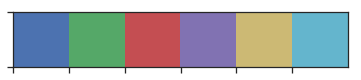

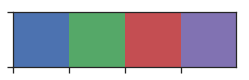

In [78]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.palplot(['b', 'g', 'r', 'm'])
plt.show()

In [39]:
b, g, r, p, t, _ = sns.color_palette('dark')

In [56]:
import matplotlib
matplotlib.__version__

'2.0.0'

In [58]:
b

(0.0, 0.10980392156862745, 0.4980392156862745)